In [92]:
import pandas as pd
csv_train = '/mnt/data/lossless_train_04102022_crops_sizes.csv'
csv_test = '/mnt/data/lossless_val_04102022_crops_sizes.csv'

In [93]:
def split_df_by_equal(df):
    one_class_quantity = len(df)//250
    delta = len(df) - 250 * one_class_quantity
    new_classes_list = []
    for i in range(250):
        new_classes_list = new_classes_list + [ i for j in range(one_class_quantity)  ]
    new_classes_list = new_classes_list + [249 for i in range(delta)]
    return new_classes_list

def df_sort_new_label(df):
    df = df.sort_values('size')
    new_classes_list = split_df_by_equal(df)
    assert len(df) == len(new_classes_list)
    df['label'] = new_classes_list
    return df

def df_shuffle_relabel(df):
    df0 = df[df['spoof'] == 0]
    df1 = df[df['spoof'] == 1]

    print('df0')
    print(df0)
    df0 = df_sort_new_label(df0)
    print(df0)

    print('df1')
    print(df1)
    df1 = df_sort_new_label(df1)
    df1['label'] = df1['label'] + 250
    print(df1)

    df = pd.concat([df0, df1], ignore_index=True, sort=False)
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [94]:
df = pd.read_csv(csv_train, sep=',')
df

,file,spoof,size
0,/mnt/data/lossless_train_04102022_crops/1/many...,1,12818.0
1,/mnt/data/lossless_train_04102022_crops/1/edge...,1,18722.0
2,/mnt/data/lossless_train_04102022_crops/0/abdf...,0,18875.0
3,/mnt/data/lossless_train_04102022_crops/1/droi...,1,12061.0
4,/mnt/data/lossless_train_04102022_crops/0/bfe6...,0,20401.0
...,...,...,...
5644715,/mnt/data/lossless_train_04102022_crops/0/ccda...,0,18924.0
5644716,/mnt/data/lossless_train_04102022_crops/0/0eb3...,0,19079.0
5644717,/mnt/data/lossless_train_04102022_crops/0/91e7...,0,23125.0
5644718,/mnt/data/lossless_train_04102022_crops/0/2e41...,0,22439.0


<AxesSubplot: >

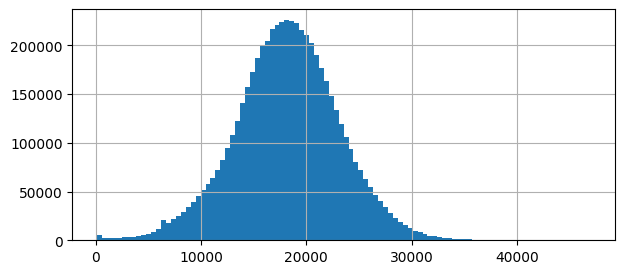

In [95]:
df['size'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot: >

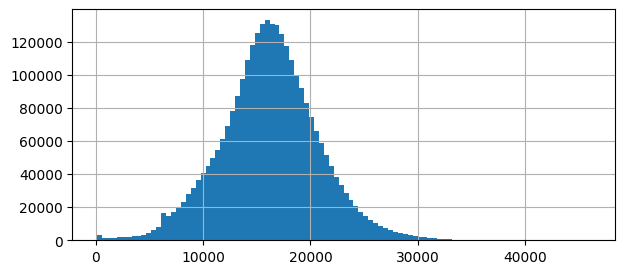

In [96]:
df[df['spoof'] == 1]['size'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot: >

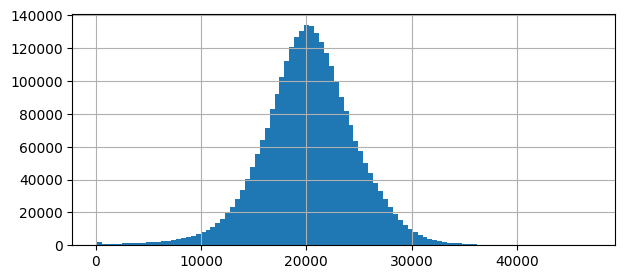

In [97]:
df[df['spoof'] == 0]['size'].hist(bins = 100, figsize = (7, 3))

In [98]:
df_new = df_shuffle_relabel(df)
df_new.to_csv('/mnt/data/lossless_train_04102022_500cls.csv', sep=',',index=False)

df0
                                                      file  spoof     size
2        /mnt/data/lossless_train_04102022_crops/0/abdf...      0  18875.0
4        /mnt/data/lossless_train_04102022_crops/0/bfe6...      0  20401.0
7        /mnt/data/lossless_train_04102022_crops/0/1305...      0  24556.0
11       /mnt/data/lossless_train_04102022_crops/0/d93f...      0   4866.0
12       /mnt/data/lossless_train_04102022_crops/0/b435...      0  16903.0
...                                                    ...    ...      ...
5644714  /mnt/data/lossless_train_04102022_crops/0/ec81...      0  17308.0
5644715  /mnt/data/lossless_train_04102022_crops/0/ccda...      0  18924.0
5644716  /mnt/data/lossless_train_04102022_crops/0/0eb3...      0  19079.0
5644717  /mnt/data/lossless_train_04102022_crops/0/91e7...      0  23125.0
5644718  /mnt/data/lossless_train_04102022_crops/0/2e41...      0  22439.0

[2785410 rows x 3 columns]
                                                      file  spoof   

In [99]:
df = pd.read_csv(csv_test, sep=',')
print(df)
df_new_test = df_shuffle_relabel(df)
df_new_test.to_csv('/mnt/data/lossless_val_04102022_500cls.csv', sep=',',index=False)

                                                    file  spoof     size
0      /mnt/data/lossless_val_04102022_crops/1/chrome...      1  12338.0
1      /mnt/data/lossless_val_04102022_crops/1/2d7db3...      1  20774.0
2      /mnt/data/lossless_val_04102022_crops/1/chroma...      1  14875.0
3      /mnt/data/lossless_val_04102022_crops/0/c86649...      0  19392.0
4      /mnt/data/lossless_val_04102022_crops/1/chrome...      1  16324.0
...                                                  ...    ...      ...
40073  /mnt/data/lossless_val_04102022_crops/1/chrome...      1  18520.0
40074  /mnt/data/lossless_val_04102022_crops/0/5c2b86...      0  17532.0
40075  /mnt/data/lossless_val_04102022_crops/0/5c79a2...      0  19532.0
40076  /mnt/data/lossless_val_04102022_crops/1/firefo...      1  13370.0
40077  /mnt/data/lossless_val_04102022_crops/1/63559a...      1  16347.0

[40078 rows x 3 columns]
df0
                                                    file  spoof     size
3      /mnt/data/loss

<AxesSubplot: >

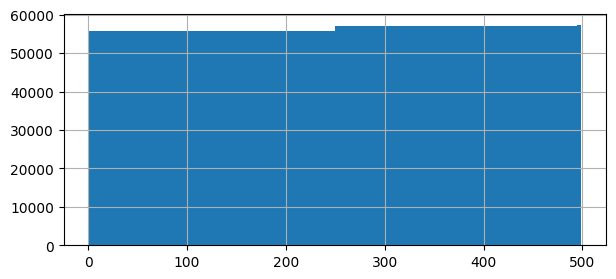

In [100]:
df_new['label'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot: >

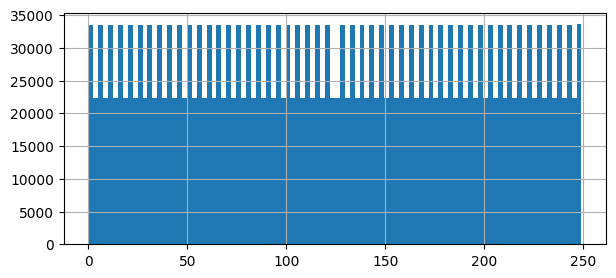

In [101]:
df_new[df_new['spoof'] == 0]['label'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot: >

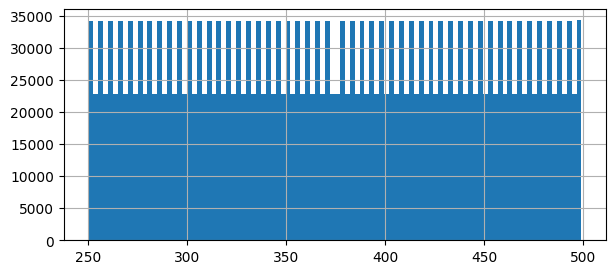

In [102]:
df_new[df_new['spoof'] == 1]['label'].hist(bins = 100, figsize = (7, 3))